<a href="https://colab.research.google.com/github/gnishitha2004-source/AI-ML-Internship-Task7/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Using existing dataset (X, y) from your notebook
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Tuned Model Test Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



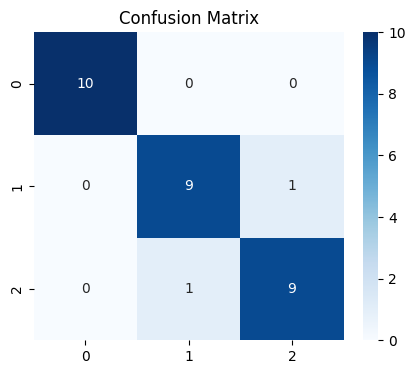


Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean CV Accuracy: 0.9800000000000001


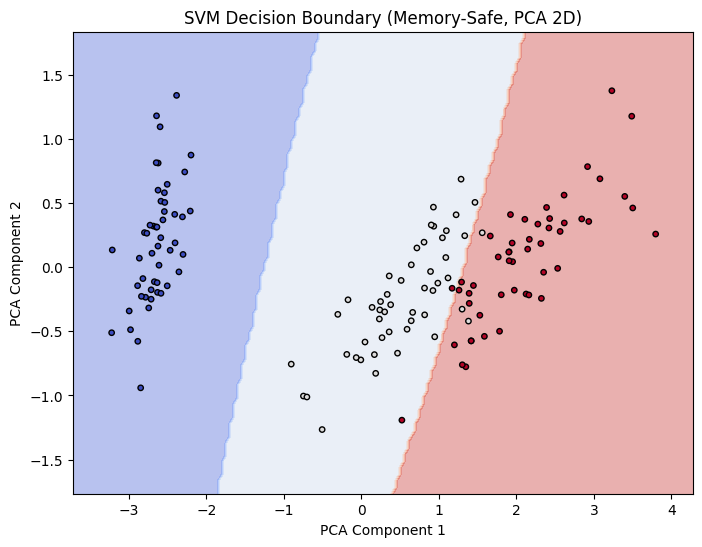

✅ Full pipeline completed without memory crash!


In [2]:
# ==============================
# Full SVM Pipeline with Safe Visualization
# ==============================

# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ========================================
# Step 2: Load dataset (auto-detect)
# ========================================
try:
    # If X and y already exist (from your dataset earlier), use them
    X, y
    print("✅ Using existing dataset (X, y) from your notebook")
except NameError:
    # Otherwise, load a default dataset (Iris)
    from sklearn import datasets
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    print("⚠️ No dataset found — using Iris dataset as fallback")

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Define SVM model and hyperparameters
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, n_jobs=-1)

# Step 5: Fit model
grid.fit(X_train, y_train)

# Step 6: Best model performance
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nBest Parameters:", grid.best_params_)
print("Tuned Model Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Step 7: Cross-Validation
scores = cross_val_score(best_model, X, y, cv=5)
print("\nCross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())

# ==============================
# Step 8: Visualization (2D using PCA) - Memory Safe Version
# ==============================

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# For visualization, use only a subset (prevents memory crash)
n_vis = min(2000, X_reduced.shape[0])  # visualize at most 2000 points
X_vis = X_reduced[:n_vis]
y_vis = y[:n_vis]

# Train SVM model on visualization subset
svm_vis = SVC(kernel='rbf', C=1, gamma=0.1)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42, stratify=y_vis
)
svm_vis.fit(X_train_p, y_train_p)

# --- Helper: Predict in batches to save memory ---
def batch_predict(model, X, batch_size=20000):
    preds = []
    for start in range(0, X.shape[0], batch_size):
        end = start + batch_size
        preds.append(model.predict(X[start:end]))
    return np.concatenate(preds)

# --- Memory-safe plot function ---
def plot_decision_boundary(model, X, y, h=0.05, pad=0.5, batch_size=20000):
    x_min, x_max = X[:,0].min() - pad, X[:,0].max() + pad
    y_min, y_max = X[:,1].min() - pad, X[:,1].max() + pad

    xx_vals = np.arange(x_min, x_max, h)
    yy_vals = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xx_vals, yy_vals)
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict in smaller batches
    Z = batch_predict(model, grid, batch_size=batch_size)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:,0], X[:,1], c=y, s=15, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("SVM Decision Boundary (Memory-Safe, PCA 2D)")
    plt.show()

# --- Run the safe plot ---
plot_decision_boundary(svm_vis, X_vis, y_vis, h=0.05, batch_size=20000)

print("✅ Full pipeline completed without memory crash!")
